# Create Beautiful Architecture Diagrams with Python


In [2]:
pip install diagrams

     |████████████████████████████████| 23.8 MB 1.4 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


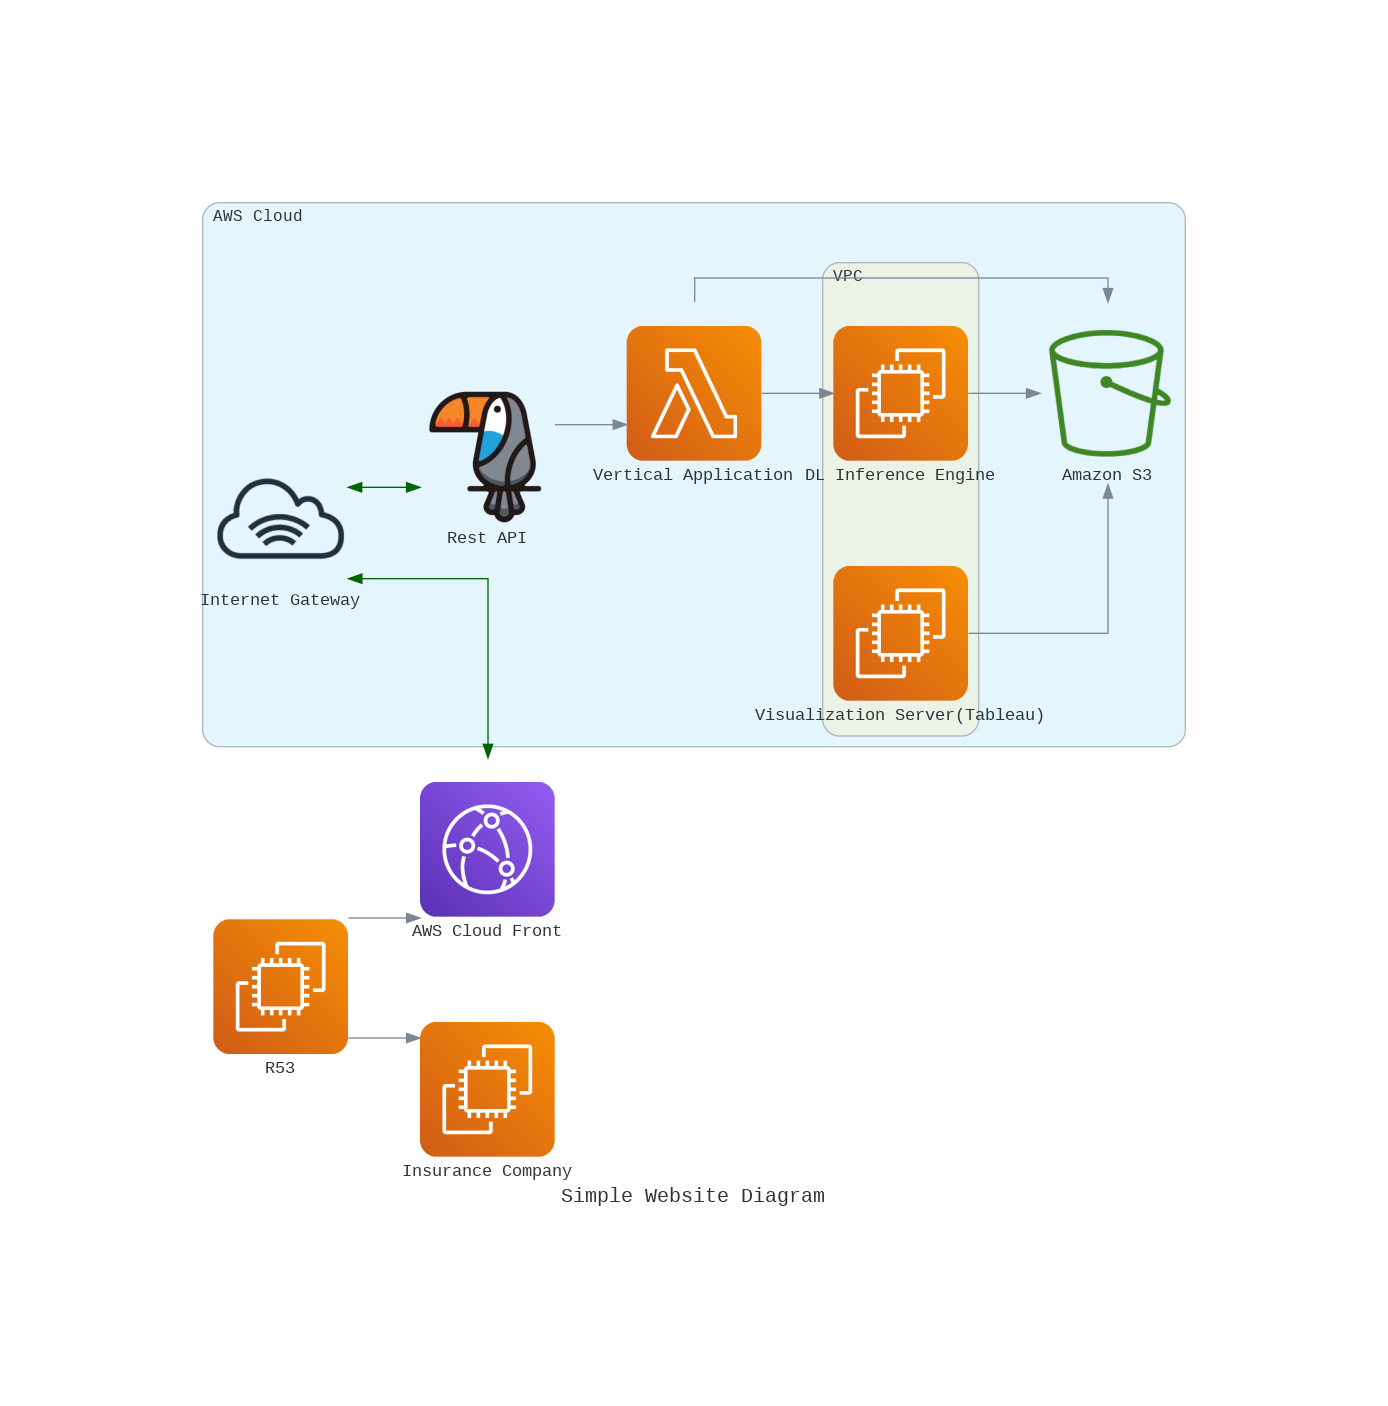

In [3]:
from diagrams import Diagram, Cluster
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.onprem.database import PostgreSQL # Would typically use RDS from aws.database
from diagrams.onprem.inmemory import Redis # Would typically use ElastiCache from aws.database
from diagrams.onprem.analytics import Tableau
from diagrams.aws.compute import Lambda
from diagrams.openstack.apiproxies import EC2API
from diagrams.aws.general import InternetGateway
from diagrams.aws.storage import SimpleStorageServiceS3Bucket

from diagrams.aws.network import CloudFront
with Diagram("Simple Website Diagram", direction='LR') as diag: # It's LR by default, but you have a few options with the orientation

    front = CloudFront("AWS Cloud Front")
    with Cluster("AWS Cloud"):

      bucket = SimpleStorageServiceS3Bucket("Amazon S3")

      vertical = Lambda("Vertical Application")

      with Cluster("VPC"):
          [vertical >> EC2("DL Inference Engine") >> bucket,
                      EC2("Visualization Server(Tableau)") >> bucket]
      api = EC2API("Rest API")
      gateway = InternetGateway("Internet Gateway")
      api >> vertical
      gateway \
        >> Edge(color="darkgreen") \
        << front
      vertical >> bucket
      gateway \
        >> Edge(color="darkgreen") \
        << api 

    R53 = EC2("R53")
    Insurance = EC2("Insurance Company")     
    R53 >> front
    R53 >> Insurance
      

diag # This will illustrate the diagram if you are using a Google Colab or Jypiter notebook.